<a href="https://colab.research.google.com/github/Shivam00100/Stock-Price-Prediction/blob/main/stockprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 6.4 MB 41.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [8]:
stocks = input("Enter the code of Stock :- ")
data = yf.download(stocks,"2008-01-01","2022-06-27",auto_adjust=True)
# data.head()
data.tail()

Enter the code of Stock :- AAPL
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2022-06-13,132.869995,135.199997,131.440002,131.880005,122207100
2022-06-14,133.130005,133.889999,131.479996,132.759995,84784300
2022-06-15,134.289993,137.339996,132.160004,135.429993,91533000
2022-06-16,132.080002,132.389999,129.039993,130.059998,108123900
2022-06-17,130.070007,133.080002,129.809998,131.559998,134118500


In [20]:
data.shape

(3642, 5)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3642 entries, 2008-01-02 to 2022-06-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3642 non-null   float64
 1   High    3642 non-null   float64
 2   Low     3642 non-null   float64
 3   Close   3642 non-null   float64
 4   Volume  3642 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 170.7 KB


In [22]:
data.describe()

,Open,High,Low,Close,Volume
count,3642.000000,3642.000000,3642.000000,3642.000000,3.642000e+03
mean,39.631997,40.066975,39.199866,39.648626,3.450914e+08
std,43.304670,43.836072,42.781664,43.326924,3.357897e+08
min,2.424281,2.503981,2.387943,2.387943,4.100000e+07
25%,11.401206,11.569081,11.305552,11.441514,1.136170e+08
50%,23.387782,23.608728,23.179518,23.470344,2.151352e+08
75%,45.476249,45.861837,45.098424,45.398707,4.541817e+08
max,182.130025,182.439174,178.629624,181.511703,3.372970e+09


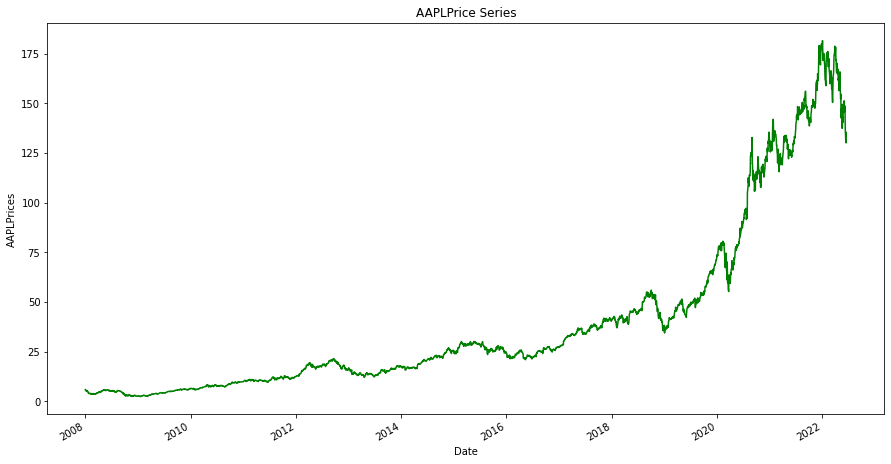

In [23]:
data.Close.plot(figsize=(15,8),color='g')
plt.ylabel("{}Prices".format(stocks))
plt.title("{}Price Series".format(stocks))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


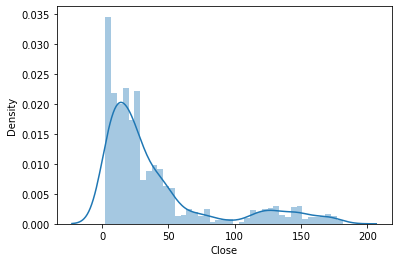

In [24]:
sns.distplot(data["Close"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


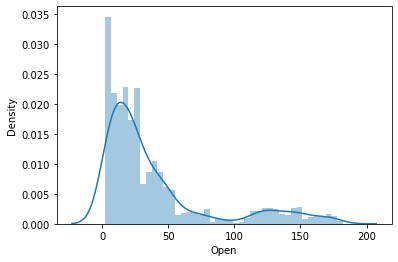

In [25]:
sns.distplot(data["Open"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


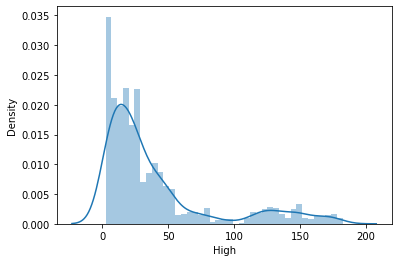

In [26]:
sns.distplot(data["High"])

In [27]:
X = data.drop("Close",axis=1)
y = data["Close"] 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2913, 4)
(729, 4)
(2913,)
(729,)


In [28]:
 from sklearn.linear_model import LinearRegression
 lr = LinearRegression()
 lr.fit(X_train,y_train)
 pred1 = lr.predict(X_test)

In [29]:
 pred1.shape

(729,)

In [30]:
from sklearn.metrics import mean_squared_error ,r2_score

def calculate_metrics(y_test,y_pred):
  mse = mean_squared_error(y_test,y_pred)
  rmse= np.sqrt(mse)
  rse = r2_score(y_test,y_pred)
  print("MSE :- ",mse)
  print("RMSE :- ",rmse)
  print("R2_score :- ",rse)

calculate_metrics(y_test,pred1)

MSE :-  0.21469904231366987
RMSE :-  0.46335628010599994
R2_score :-  0.9998924771060114


In [31]:
 from sklearn.linear_model import Lasso, Ridge 

 la = Lasso().fit(X_train, y_train )
 ri = Ridge().fit(X_train, y_train ) 

 la_p = la.predict(X_test) 
 ri_p = ri.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.575e+02, tolerance: 5.379e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.30811e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [32]:
 calculate_metrics(y_test, la_p)

MSE :-  0.8825054133671528
RMSE :-  0.9394175926429912
R2_score :-  0.9995580346564042


In [33]:
 calculate_metrics(y_test, ri_p)

MSE :-  0.21470476059199048
RMSE :-  0.463362450563261
R2_score :-  0.9998924742422547


In [34]:
 from sklearn.svm import SVR 
 from sklearn.model_selection import GridSearchCV 

 svr = SVR() 

 param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

 grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
 grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.122 total time=   0.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.126 total time=   0.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.140 total time=   0.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.143 total time=   0.3s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.143 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.122 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.126 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.140 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.143 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.143 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.122 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [35]:
GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [36]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 


In [37]:
svr_pred

array([23.92443982, 23.92443982, 23.92443982, 23.92443982, 23.92443982,
       23.92443982, 23.92443982, 23.92443982, 23.92443982, 23.92443982,
       23.92443982, 23.92443982, 23.92443982, 23.92443982, 23.92443982,
       23.92443982, 23.92443982, 23.92443982, 23.92443982, 23.92443982,
       23.92443982, 23.92443982, 23.92443982, 23.92443982, 23.92443982,
       23.92443982, 23.92443982, 23.92443982, 23.92443982, 23.92443982,
       23.92443982, 23.92443982, 23.92443982, 23.92443982, 23.92443982,
       23.92443982, 23.92443982, 23.92443982, 23.92443982, 23.92443982,
       23.92443982, 23.92443982, 23.92443982, 23.92443982, 23.92443982,
       23.92443982, 23.92443982, 23.92443982, 23.92443982, 23.92443982,
       23.92443982, 23.92443982, 23.92443982, 23.92443982, 23.92443982,
       20.13449134, 23.92443982, 23.92443982, 23.92443982, 23.92443982,
       23.92443982, 23.92443982, 23.92443982, 23.92443982, 23.92443982,
       23.92443982, 23.92443982, 23.92443982, 23.92443982, 23.92

In [38]:
from sklearn.metrics import mean_squared_error ,r2_score

def calculate_metrics(y_test,svr_pred):
  mse = mean_squared_error(y_test,svr_pred)
  rmse= np.sqrt(mse)
  rse = r2_score(y_test,svr_pred)

  print("MSE :- ",mse)
  print("RMSE :- ",rmse)
  print("R2_score :- ",rse)

calculate_metrics(y_test,svr_pred)

MSE :-  2260.323705133292
RMSE :-  47.54286176844314
R2_score :-  -0.1319870992805705


In [39]:
import joblib  
joblib.dump(ri, 'model.pkl') 
ridge_from_joblib = model = joblib.load("model.pkl")